In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path

In [ ]:
# load drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Make Participant List
participants = []
for i in range(1,18):
  if i != 1 and i!=12:
    participants.append("S"+ str(i))

print(participants)

participants_id = [x[1:] for x in participants]
print(participants_id)

['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17']
['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '13', '14', '15', '16', '17']


# **Data Extraction**
Read data from .pkl file and save as .csv files for each patient. 

In [ ]:
# reading synchronized data from pickle file
def getSyncData(participant):
  path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/'.format(participant)
  df = pd.read_pickle(path + "S" + str(participant) + '.pkl')

  return df

In [ ]:
# save synchronized data to drive
def saveSyncData(participant):
  
  path =  '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/sync_data/'.format(participant)

  #create directory
  if not os.path.isdir(path):
    os.mkdir(path)

  # get wrist data for participant(dictionary)
  data = getSyncData(participant)
  wrist_data = data['signal']['wrist']
  label = data['label']

  #save data for participant
  # iterate through the files (key names) in the wrist data 
  for field in wrist_data:
    df = pd.DataFrame(wrist_data[field])
    
    # save file
    df.to_csv(os.path.join(path, '{}.csv'.format(field)), index=False)


In [ ]:
# test function for one participant
saveSyncData(2)

In [ ]:
# save synchronized data for all participants
for participant in participants_id:
  saveSyncData(participant)

# **Split ACC Data**
Split data in ACC.csv into seperate .csv files X, Y, Z. ACC.csv files have three columns: x,y,z.

In [ ]:
def seperateACC(participant):
  path =  '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/sync_data/'.format(participant)
  data = pd.read_csv(path + 'ACC.csv')

  # keep old headers (this is UNIX time stamp not to be omitted)
  old_headers = list(data.columns.values)

  # change header for easy access
  header_list = ['x', 'y', 'z']

  # add new header
  data.to_csv("ACC_header.csv", header = header_list, index=False)

  # read new csv with new header
  data_header = pd.read_csv("ACC_header.csv")

  # split  x, y, z columns into seperate dataframes
  df_x = data_header['x'].to_frame()
  df_y = data_header['y'].to_frame()
  df_z = data_header['z'].to_frame()

  # save files
  df_x.to_csv(os.path.join(path,"ACC_x.csv"), index = False, header = [old_headers[0]])
  df_y.to_csv(os.path.join(path,"ACC_y.csv"), index = False, header = [old_headers[1]])
  df_z.to_csv(os.path.join(path,"ACC_z.csv"), index = False, header = [old_headers[2]])

In [ ]:
# Seperate all ACC synch files for all participants

for participant in participants_id:
  seperateACC(participant)

In [ ]:
def getSyncCSV(participant):
  """function that accesses the watch data that has been syncronized with the chest
  device data and stores .csv files into a dictionary. 
  participant: number  that references a participant in the dataset.
  """

  path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/sync_data/'.format(participant)

  data = {}

  data['ACC'] = pd.read_csv(path + 'ACC.csv')
  data['ACC_x'] = pd.read_csv(path + 'ACC_x.csv')
  data['ACC_y'] = pd.read_csv(path + 'ACC_y.csv')
  data['ACC_z'] = pd.read_csv(path + 'ACC_z.csv')
  data['BVP'] = pd.read_csv(path + 'BVP.csv')
  data['EDA'] = pd.read_csv(path + 'EDA.csv')
  data['TEMP'] = pd.read_csv(path + 'TEMP.csv')

  return data

# **Data Visualization and Validation of Code**

In [ ]:
# testing for S2

s2_data = getSyncCSV(2)

ACC


,0,1,2
0,62.0,-21.0,107.0
1,66.0,13.0,53.0
2,41.0,9.0,15.0
3,52.0,16.0,24.0
4,54.0,15.0,34.0
...,...,...,...
194523,87.0,27.0,23.0
194524,67.0,32.0,29.0
194525,41.0,25.0,11.0
194526,39.0,27.0,22.0


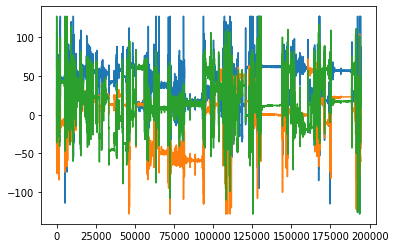

ACC_x


,0
0,62.0
1,66.0
2,41.0
3,52.0
4,54.0
...,...
194523,87.0
194524,67.0
194525,41.0
194526,39.0


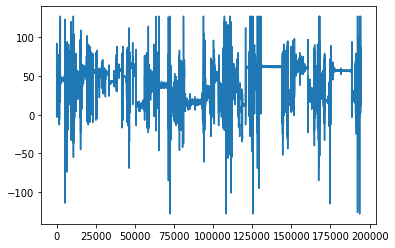

ACC_y


,1
0,-21.0
1,13.0
2,9.0
3,16.0
4,15.0
...,...
194523,27.0
194524,32.0
194525,25.0
194526,27.0


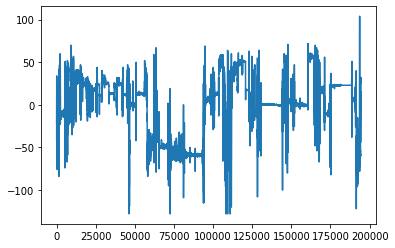

ACC_z


,2
0,107.0
1,53.0
2,15.0
3,24.0
4,34.0
...,...
194523,23.0
194524,29.0
194525,11.0
194526,22.0


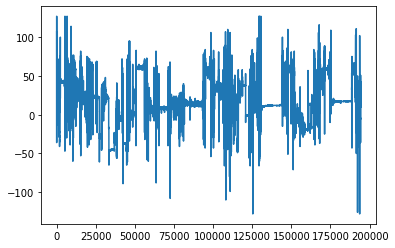

BVP


,0
0,-59.37
1,-53.42
2,-44.40
3,-33.17
4,-20.79
...,...
389051,18.33
389052,18.26
389053,18.26
389054,18.68


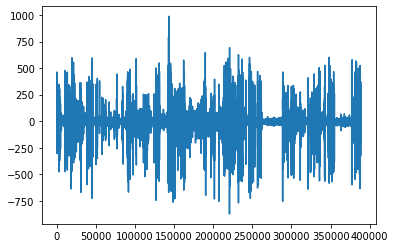

EDA


,0
0,1.138257
1,1.125444
2,1.011405
3,1.033188
4,0.935807
...,...
24311,0.063052
24312,0.060489
24313,0.059208
24314,0.073303


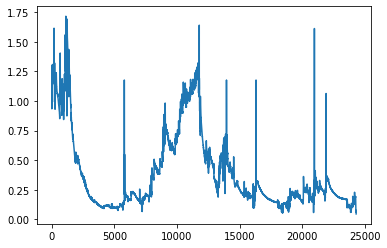

TEMP


,0
0,35.41
1,35.41
2,35.41
3,35.41
4,35.41
...,...
24311,34.21
24312,34.23
24313,34.23
24314,34.23


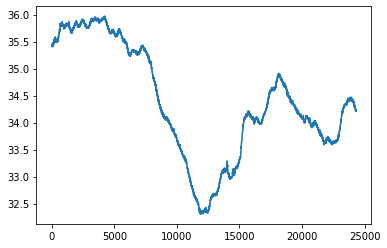

In [ ]:
for signal in s2_data:
  print(signal)
  display(s2_data[signal])
  plt.plot(s2_data[signal])
  plt.show()

# **Data Resampling**
Sensors from Empatica E4 have recorded different signals at different frequencies. The frequencies are on the first line (after header) of each file.

ACC: 32Hz
BVP: 64Hz
EDA: 4Hz
TEMP: 4Hz

The code below changes all frequencies to 128 Hz in order to match the data of our seizure model.

In [ ]:
from scipy import signal

In [ ]:
# make a dictionary of sampling frequencies
sampling_freq = {"ACC_x":32, "ACC_y": 32, "ACC_z": 32, "BVP": 64, "EDA": 4, "TEMP":4}

In [ ]:
def getNumSignals(new_freq, old_freq, num_rows):
  ''' helper function to calculate the number of samples required
  to resample the signal to a desired frequency.
  new_freq: desired frequency
  old_freq: signal's original freqency
  num_rows: number of current samples in the original dataset
  '''

  return int((num_rows/old_freq)*new_freq)

In [ ]:
'''
def remove_rows(dataframe):
  """ helper function to drop the non-signal rows of the dataset. 
  In this dataset, second row (or, first row after header) is the sampling 
  frequency. the header is changed and the first row is removed before
  resampling data
  """

  dataframe_drop = dataframe.drop(labels = 0, axis = 0)
  dataframe_drop_reindex = dataframe_drop.reset_index(drop=True)
  dataframe_drop_reindex_header = dataframe_drop_reindex.copy()
  dataframe_drop_reindex_header.columns = ['signal']

  return dataframe_drop_reindex_header
'''

In [ ]:
def resample(participant, field, new_freq, old_freq):
  """function to resample the the synchronized watch data.
  participant: number that represents a person in the dataset
  field: signal type (BVP, ACC, etc.) as a string
  new_freq: desired new frequency
  old_freq: original frequency
  """

  path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/sync_data/'.format(participant)
  data = pd.read_csv(path + "{}.csv".format(field))

  # find number of signals needed in resampled data
  num_signals = getNumSignals(new_freq, old_freq,len(data))  

  # resample data
  resampled_df = pd.DataFrame(signal.resample(data, num_signals))

  """# save file
  # create a new directory
  dir =  '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/sync_data/resampled/'.format(participant)
  
  if not os.path.isdir(dir):
    os.mkdir(dir)
  resampled_df.to_csv(os.path.join(dir, "{}.csv".format(field)), index=False)
  """
  return resampled_df

In [ ]:
def savedResampledData(participant, field, resampled_data):
  '''
  participant: number that represents a person in the dataset
  field: signal type (BVP, ACC, etc.) as a string
  resampled_data: pandas dataframe
  '''

  dir = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/sync_data/resampled/'.format(participant)

  # make directory
  if not os.path.isdir(dir):
    os.mkdir(dir)
  resampled_data.to_csv(os.path.join(dir, "{}.csv".format(field)), index=False)

In [ ]:
# trial
resampled_bvp = resample(2,"BVP", 128, 64)
bvp = getSyncCSV(2)['BVP']

Resampled BVP Data:


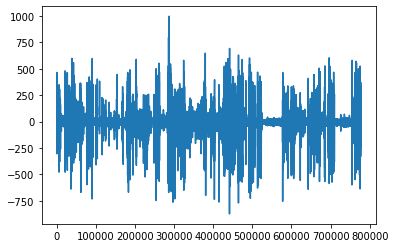

,0
0,-59.370000
1,-68.005327
2,-53.420000
3,-43.055017
4,-44.400000
...,...
778107,12.223733
778108,18.680000
778109,30.264396
778110,19.710000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778112 entries, 0 to 778111
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       778112 non-null  float64
dtypes: float64(1)
memory usage: 5.9 MB
Original BVP Data:


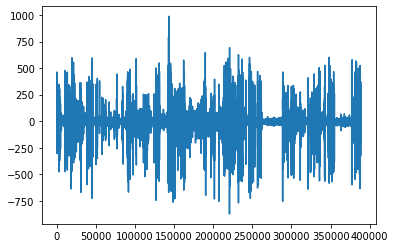

,0
0,-59.37
1,-53.42
2,-44.40
3,-33.17
4,-20.79
...,...
389051,18.33
389052,18.26
389053,18.26
389054,18.68


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389056 entries, 0 to 389055
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       389056 non-null  float64
dtypes: float64(1)
memory usage: 3.0 MB
Plotted On Top of Each Other:


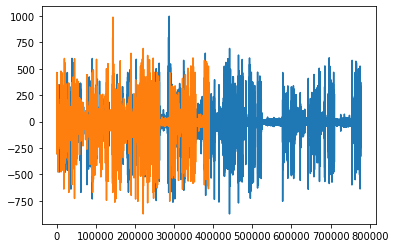

In [ ]:
print("Resampled BVP Data:")
plt.plot(resampled_bvp)
plt.show()
display(resampled_bvp)
resampled_bvp.info()

print("Original BVP Data:")
plt.plot(bvp)
plt.show()
display(bvp)
bvp.info()

print("Plotted On Top of Each Other:")
plt.plot(resampled_bvp)
plt.plot(bvp)
plt.show()

In [ ]:
# resample all watch data for all patients
field_list = ['ACC_x', 'ACC_y', 'ACC_z', 'BVP', 'EDA','TEMP']

In [ ]:
for participant in participants_id:
  for field in field_list:
    resampled = resample(participant, field, 128, sampling_freq[field])
    savedResampledData(participant,field,resampled)

In [ ]:
def getResampledData(participant):
  """function that accesses the watch data that has been resampled to 128 Hz
   and stores .csv files into a dictionary. 
  participant: number  that references a participant in the dataset.
  """

  path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/sync_data/resampled/'.format(participant)

  data = {}

  #data['ACC'] = pd.read_csv(path + 'ACC.csv')
  data['ACC_x'] = pd.read_csv(path + 'ACC_x.csv')
  data['ACC_y'] = pd.read_csv(path + 'ACC_y.csv')
  data['ACC_z'] = pd.read_csv(path + 'ACC_z.csv')
  data['BVP'] = pd.read_csv(path + 'BVP.csv')
  data['EDA'] = pd.read_csv(path + 'EDA.csv')
  data['TEMP'] = pd.read_csv(path + 'TEMP.csv')

  return data

ACC_x


,0
0,62.000000
1,63.953914
2,66.111191
3,67.246274
4,66.000000
...,...
778107,52.083919
778108,56.000000
778109,58.537821
778110,59.875284


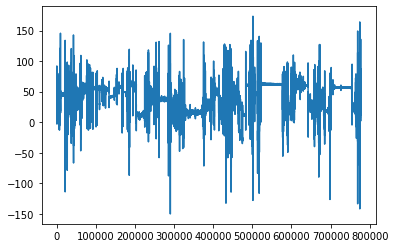

ACC_y


,0
0,-21.000000
1,-18.554489
2,-9.448018
3,2.553988
4,13.000000
...,...
778107,34.398130
778108,26.000000
778109,12.372066
778110,-2.920427


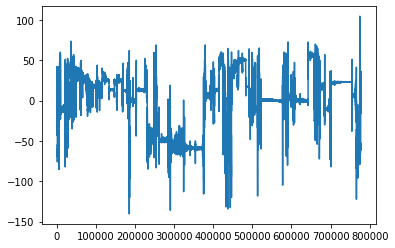

ACC_z


,0
0,107.000000
1,112.765138
2,102.395428
3,79.912907
4,53.000000
...,...
778107,2.279388
778108,10.000000
778109,29.761696
778110,57.853185


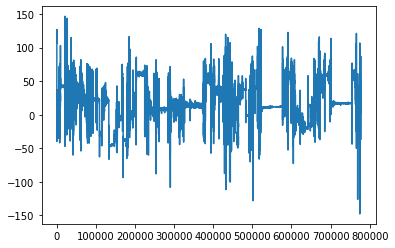

BVP


,0
0,-59.370000
1,-68.005327
2,-53.420000
3,-43.055017
4,-44.400000
...,...
778107,12.223733
778108,18.680000
778109,30.264396
778110,19.710000


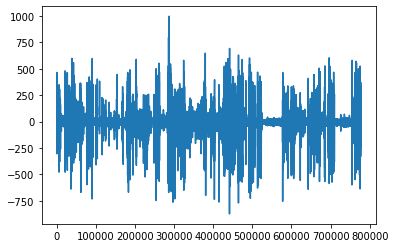

EDA


,0
0,1.138257
1,1.162649
2,1.185245
3,1.205998
4,1.224870
...,...
778107,0.991696
778108,1.024019
778109,1.054927
778110,1.084324


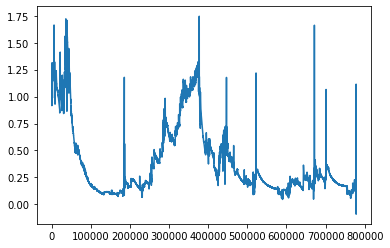

TEMP


,0
0,35.410000
1,35.434604
2,35.457267
3,35.477953
4,35.496639
...,...
778107,35.259845
778108,35.293251
778109,35.325053
778110,35.355162


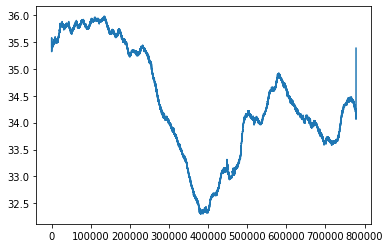

Now plot on top of each other


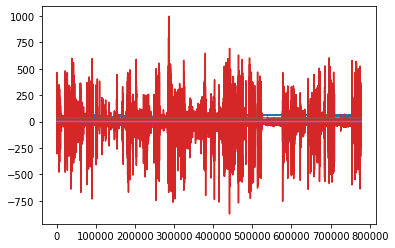

In [ ]:
# testing/visualizing resampling using S2

s2_resampled = getResampledData(2)

for signal in s2_resampled:
  print(signal)
  display(s2_resampled[signal])
  plt.plot(s2_resampled[signal])
  plt.show()

print("Now plot on top of each other")
for signal in s2_resampled:
  plt.plot(s2_resampled[signal])

# **Normalizing Data**
Normalize data using MinMaxScaler from 1 to -1. This includes the data that will later on be used to test as this normalization method does not use any kind of information from the training data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def normalizeData(data):
  """Function that normalizes a pandas dataframe using MinMaxScaler from
  -1 to 1. Returns the normalized dataframe. 
  data: pandas dataframe"""

  data = data.to_numpy()
  scaler = MinMaxScaler(feature_range=(-1,1))
  normalized_data = scaler.fit_transform(data.reshape(-1,1))

  # convert numpy array back to pandas df
  return pd.DataFrame(normalized_data)


Original BVP (resampled)


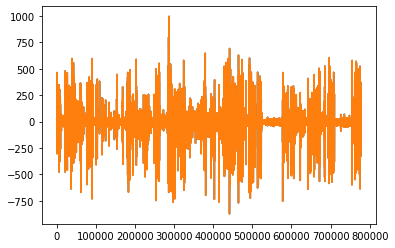

,0
0,-59.370000
1,-68.005327
2,-53.420000
3,-43.055017
4,-44.400000
...,...
778107,12.223733
778108,18.680000
778109,30.264396
778110,19.710000


Normalized BVP


,0
0,-0.129139
1,-0.138375
2,-0.122776
3,-0.111691
4,-0.113130
...,...
778107,-0.052573
778108,-0.045668
778109,-0.033279
778110,-0.044567


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778112 entries, 0 to 778111
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       778112 non-null  float64
dtypes: float64(1)
memory usage: 5.9 MB


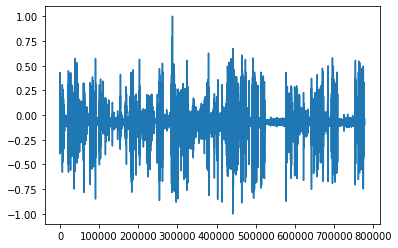

In [ ]:
# testing normalized data
print("Original BVP (resampled)")
plt.plot(resampled_bvp)
plt.plot(resampled_bvp)
plt.show()
display(resampled_bvp)

print("Normalized BVP")
norm_bvp = normalizeData(resampled_bvp)
plt.plot(norm_bvp)
display(norm_bvp)
norm_bvp.info()

In [ ]:
def saveNormalizedData(participant, field):
  """Function that saves normalized data given the signal type and participant.
  participant: number associated with person in dataset
  field: signal type (e.g. BVP) as a string
  """

  # make directory
  dir = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/sync_data/normalized/'.format(participant)
  if not os.path.isdir(dir):
    os.mkdir(dir)

  # get resmapled data
  path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/sync_data/resampled/'.format(participant)
  data = pd.read_csv(path + "{}.csv".format(field))

  # normalize the resampled data
  normalized_data = normalizeData(data)

  # save normalized data to new directory
  normalized_data.to_csv(os.path.join(dir + "{}.csv".format(field)), index=False)


In [ ]:
# normalize and save files for all patients
for participant in participants_id:
  for field in field_list:
    saveNormalizedData(participant, field)

In [ ]:
def getNormalizedData(partcipant):
  """function that accesses the watch data that has been resampled AND normalized
   and stores .csv files into a dictionary. 
  participant: number  that references a participant in the dataset.
  """

  path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/sync_data/normalized/'.format(participant)

  data = {}

  #data['ACC'] = pd.read_csv(path + 'ACC.csv')
  data['ACC_x'] = pd.read_csv(path + 'ACC_x.csv')
  data['ACC_y'] = pd.read_csv(path + 'ACC_y.csv')
  data['ACC_z'] = pd.read_csv(path + 'ACC_z.csv')
  data['BVP'] = pd.read_csv(path + 'BVP.csv')
  data['EDA'] = pd.read_csv(path + 'EDA.csv')
  data['TEMP'] = pd.read_csv(path + 'TEMP.csv')

  return data

ACC_x


,0
0,-0.207938
1,-0.173310
2,-0.189647
3,-0.160116
4,-0.005365
...,...
757755,-0.820291
757756,-0.898189
757757,-0.792067
757758,-0.572385


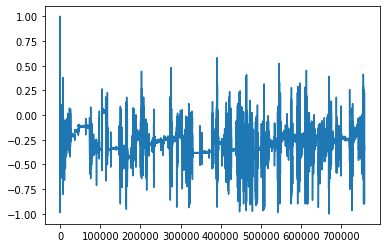

ACC_y


,0
0,-0.503529
1,-0.662892
2,-0.629556
3,-0.455765
4,-0.246756
...,...
757755,0.456384
757756,0.594394
757757,0.493982
757758,0.197125


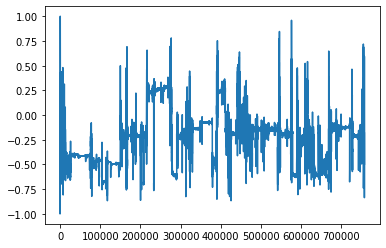

ACC_z


,0
0,-0.658942
1,-0.859046
2,-0.751457
3,-0.381062
4,0.113549
...,...
757755,0.715861
757756,0.856329
757757,0.700946
757758,0.294395


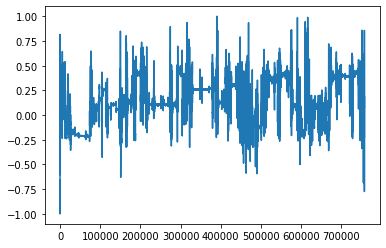

BVP


,0
0,-0.025368
1,-0.024313
2,-0.025233
3,-0.025736
4,-0.025208
...,...
757755,-0.030300
757756,-0.031451
757757,-0.032983
757758,-0.032397


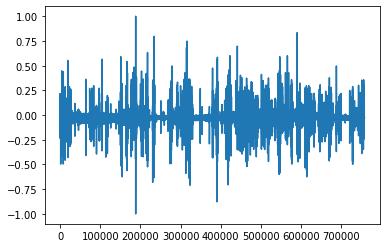

EDA


,0
0,0.418616
1,0.444753
2,0.468850
3,0.490866
4,0.510775
...,...
757755,0.259469
757756,0.294832
757757,0.328517
757758,0.360430


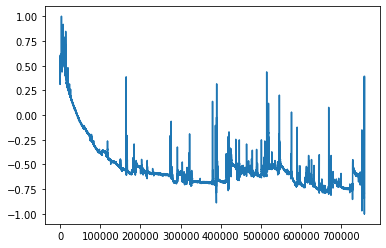

TEMP


,0
0,0.786969
1,0.819171
2,0.848767
3,0.875711
4,0.899972
...,...
757755,0.589473
757756,0.633516
757757,0.675398
757758,0.715000


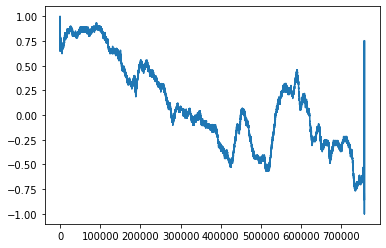

In [ ]:
# testing the normalization + saving of data for S2
s2_normalized = getNormalizedData(2)

for signal in s2_normalized:
  print(signal)
  display(s2_normalized[signal])
  plt.plot(s2_normalized[signal])
  plt.show()